In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import norm

Cuando habla de calcular amplitud habla de calcular con la norma 1, y la energía con la norma 2.

# Ejercicio 1

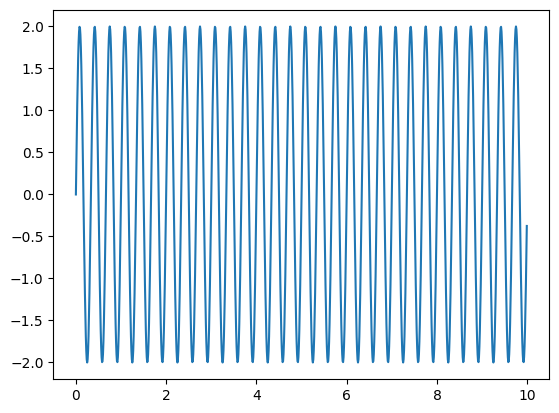

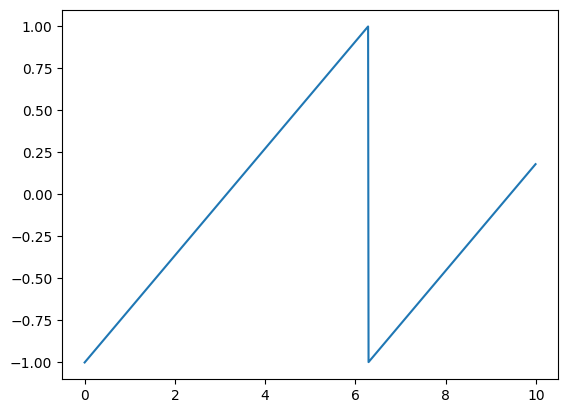

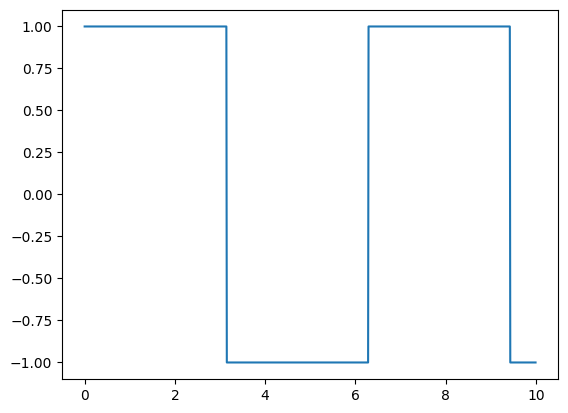

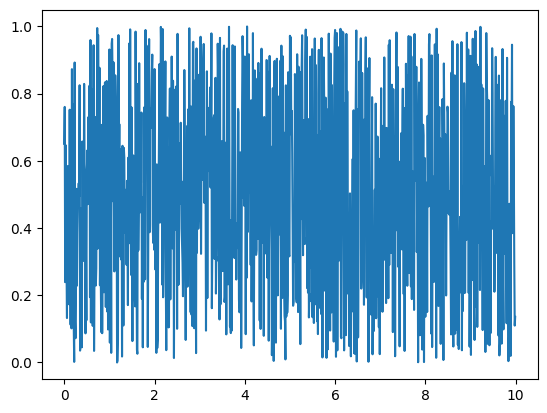

In [2]:
#-------- Generación de señales

#Frecuencia de muestreo
fm = 100

#Eje temporal
t = np.arange(0, 10, 1/fm) # de 0 a 1-1/fm

#Frecuencia de las señales
fs = 3;

#señal senoidal
A = 2
senoidal = A*np.sin(2*np.pi*fs*t)

#señal rampa
rampa = signal.sawtooth(t)

#señal cuadrada
cuadrada = signal.square(t)

#señal aleatoria - ruido uniforme
aleatoria = np.random.rand(len(t))

señales = [["Senoidal", senoidal], ["Rampa", rampa], ["Cuadrada", cuadrada], ["Aleatoria", aleatoria]]


#señal aleatoria - ruido gaussiano
#randn

for señal in señales:
  s = señal[1]
  plt.plot(t, s)
  plt.show()

In [3]:
v_med = t.mean()

v_min = t.min()

v_max = t.max()

print(f"Valor mínimo: {v_min}\nValor medio: {v_med}\nValor máximo: {v_max}\n")
for señal in señales:
  s = señal[1]
  #Amplitud
  amp = np.max(np.abs(s)) #Otra forma
  amp = norm(s, np.inf) #Una forma

  #Energía
  en = np.sum(np.abs(s)**2)
  en = norm(s, 2)**2
  en = s @ s #Hace el producto interno de un vector con otro

  #Accion
  accion = np.sum(np.abs(s))
  accion = norm(s, 1)

  #Potencia media
  p = np.sum(np.abs(s)**2/len(s))
  p = en/len(s)

  #RMS
  rms = np.sqrt(p)

  print(f"{señal[0]}:\n\t-Amplitud: {amp}\n\t-Energía: {en}\n\t-Acción: {accion}\n\t-Potencia media: {p}\n\t-RMS: {rms}")

Valor mínimo: 0.0
Valor medio: 4.995
Valor máximo: 9.99

Senoidal:
	-Amplitud: 2.0
	-Energía: 1999.9999999999998
	-Acción: 1272.8206381509576
	-Potencia media: 1.9999999999999998
	-RMS: 1.414213562373095
Rampa:
	-Amplitud: 1.0
	-Energía: 315.28562387862684
	-Acción: 476.91400311217865
	-Potencia media: 0.31528562387862685
	-RMS: 0.5615030043362429
Cuadrada:
	-Amplitud: 1.0
	-Energía: 1000.0
	-Acción: 1000.0
	-Potencia media: 1.0
	-RMS: 1.0
Aleatoria:
	-Amplitud: 0.9993527582141144
	-Energía: 333.68661201119176
	-Acción: 500.5066122596143
	-Potencia media: 0.33368661201119176
	-RMS: 0.5776561364784345


| Caso | Frecuencia | Amplitud | Esp. vectorial |
| ----|----|----| ---- |
|1| = | = | ✅ |
|2| = | <>| ✅ |
|3| <> | =| ❌ |
|4| <> | <> | ❌ |

La propiedad más importante es la cerradura frente a la suma


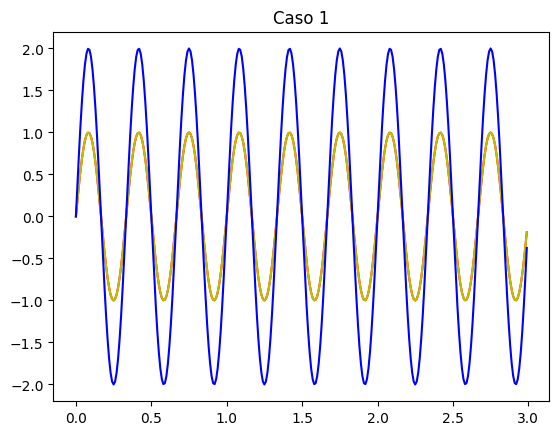

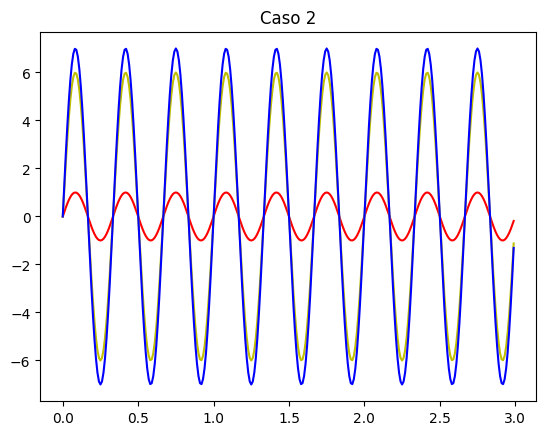

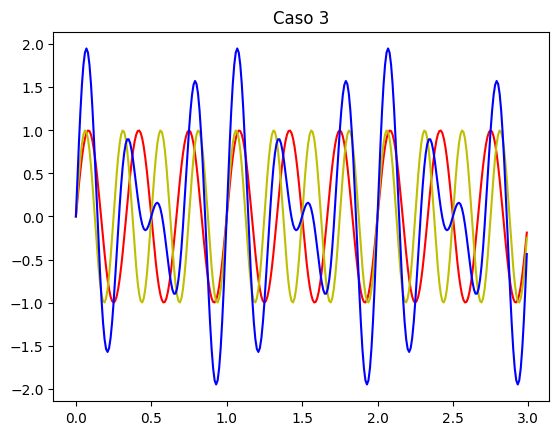

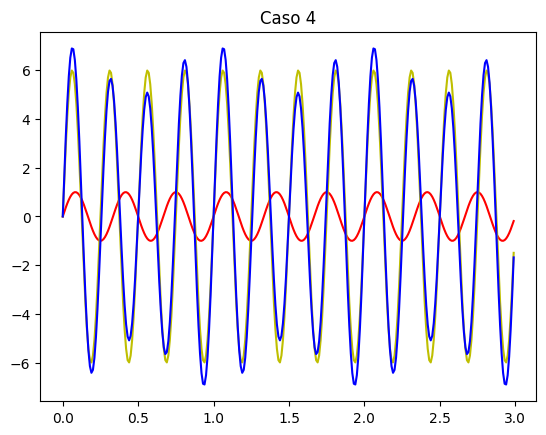

In [4]:
#Frecuencia de muestreo
fm = 100

#Eje temporal
t = np.arange(0, 3, 1/fm) # de 0 a 1-1/fm

casos = {
    "1" : {
        "f_1" : 3,
        "f_2" : 3,
        "a_1" : 1,
        "a_2" : 1
    },

    "2" :
    {
        "f_1" : 3,
        "f_2" : 3,
        "a_1" : 1,
        "a_2" : 6
    },
    "3" :
    {
        "f_1" : 3,
        "f_2" : 4,
        "a_1" : 1,
        "a_2" : 1
    },
    "4" :
    {
        "f_1" : 3,
        "f_2" : 4,
        "a_1" : 1,
        "a_2" : 6
    },
}

plt
for i in range(4):
  caso = casos[f"{i+1}"]
  f1 = caso["f_1"]
  f2 = caso["f_2"]
  a1 = caso["a_1"]
  a2 = caso["a_2"]

  s_1 = a1*np.sin(2*np.pi*f1*t)
  s_2 = a2*np.sin(2*np.pi*f2*t)

  s_3 = s_1 + s_2

  plt.plot(t, s_1, color="r")
  plt.plot(t, s_2, color="y")
  plt.plot(t, s_3, color="b")
  plt.title(f"Caso {i+1}")
  plt.show()

**Podemos ver que lo limitante es la frecuencia.**

# Ejercicio 3

In [5]:
#-------- Generación de señales

#Frecuencia de muestreo
fm = 100

#Eje temporal
t = np.arange(0, 10, 1/fm) # de 0 a 1-1/fm

#Frecuencia de las señales
fs = 3;

#señal senoidal
A = 2
s_1 = A*np.sin(2*np.pi*fs*t)



frecuencias = np.linspace(1, 10, 10)
s_2s = []
for frec in frecuencias:
  s_2 = A*np.sin(2*np.pi*frec*t)
  s_2s.append([s_2, frec])

productos = []
for s_2 in s_2s:
  print(f"{fs} . {s_2[1]}:\n\tProd. interno= {s_1 @ s_2[0]}")
  productos.append(s_1 @ s_2[0])

3 . 1.0:
	Prod. interno= 4.54754289780368e-13
3 . 2.0:
	Prod. interno= 2.6942337250090986e-13
3 . 3.0:
	Prod. interno= 1999.9999999999998
3 . 4.0:
	Prod. interno= -3.677613769070831e-13
3 . 5.0:
	Prod. interno= -4.846123502488808e-14
3 . 6.0:
	Prod. interno= -6.434297539215095e-13
3 . 7.0:
	Prod. interno= -1.542654892716655e-13
3 . 8.0:
	Prod. interno= 1.508848601616819e-12
3 . 9.0:
	Prod. interno= -4.504230322055491e-12
3 . 10.0:
	Prod. interno= -2.525757381022231e-13


In [6]:
#Frecuencia de muestreo
fm = 100

#Eje temporal
t = np.arange(0, 5, 1/fm) # de 0 a 1-1/fm

#Frecuencia de las señales
fs = 3;

#señal senoidal
A = 2
senoidal = A*np.sin(2*np.pi*fs*t)

#señal cuadrada
cuadrada = signal.square(2*np.pi*fs*t)

print("Prod interno consigo misma:\n\ts_1 @ s_1=", senoidal @ senoidal)
print("Prod interno con cuadrada de igual f:\n\ts_1 @ cuadrada=", senoidal @ cuadrada)

dif = np.arange(0, 1.1, .1)

for d in dif:
  cuadrada = signal.square(2*np.pi*(fs+d)*t)
  print(f"Prod interno con cuadrada f+{d}:\n\ts_1 @ cuadrada=", senoidal @ cuadrada)

Prod interno consigo misma:
	s_1 @ s_1= 1000.0
Prod interno con cuadrada de igual f:
	s_1 @ cuadrada= 636.4103190754789
Prod interno con cuadrada f+0.0:
	s_1 @ cuadrada= 636.4103190754789
Prod interno con cuadrada f+0.1:
	s_1 @ cuadrada= -4.939937348069634e-13
Prod interno con cuadrada f+0.2:
	s_1 @ cuadrada= 2.4530377729092834e-13
Prod interno con cuadrada f+0.30000000000000004:
	s_1 @ cuadrada= -1.174060848541103e-13
Prod interno con cuadrada f+0.4:
	s_1 @ cuadrada= -1.162107426927537
Prod interno con cuadrada f+0.5:
	s_1 @ cuadrada= 1.609823385706477e-15
Prod interno con cuadrada f+0.6000000000000001:
	s_1 @ cuadrada= 3.9999999999999796
Prod interno con cuadrada f+0.7000000000000001:
	s_1 @ cuadrada= 5.667688540711424e-14
Prod interno con cuadrada f+0.8:
	s_1 @ cuadrada= 1.730954568989658
Prod interno con cuadrada f+0.9:
	s_1 @ cuadrada= -2.8144153674247718e-14
Prod interno con cuadrada f+1.0:
	s_1 @ cuadrada= -11.999999999999956


Ni bien me muevo de la frecuencia el parecido de las señales cae rapidamente.

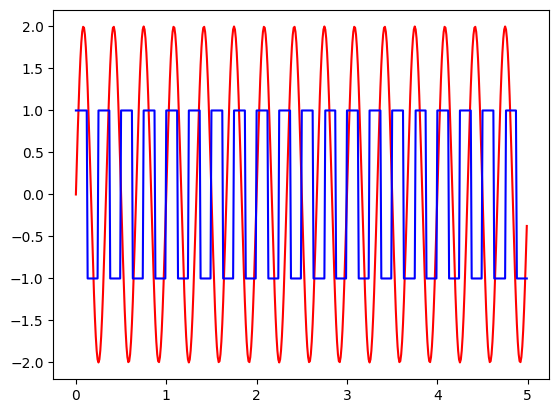

In [7]:
plt.plot(t, senoidal, color="r")
plt.plot(t, cuadrada, color="b")

In [8]:
#print("Prod interno con cuadrada de igual f:\n\ts_1 @ s_1=", s_1 @ cuadrada)

# 6)

Vamos a tener un conjunto de señales con diferentes.

In [9]:
frecuencias = [i+1 for i in range(10)]
print(frecuencias)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [10]:
fm = 22
t = np.arange(0, 1, 1/fm)
senoidales = []
for frec in frecuencias:
  sen = np.sin(2*np.pi*frec*t)
  senoidales.append(sen)

La transofrmada discreta de fourieres una herramienta de análisis.

La TDF nos permite ver el aporte de cada una de las señales con su frecuencia.

In [11]:
d = np.zeros(len(frecuencias))
x = 0.5*np.sin(2*np.pi*3*t)-0.75*np.sin(np.pi*14*t)+(1/3)*np.sin(t*np.pi*18)
for i, sen in zip(range(len(d)), senoidales):
  d[i] = x @ sen

<BarContainer object of 10 artists>

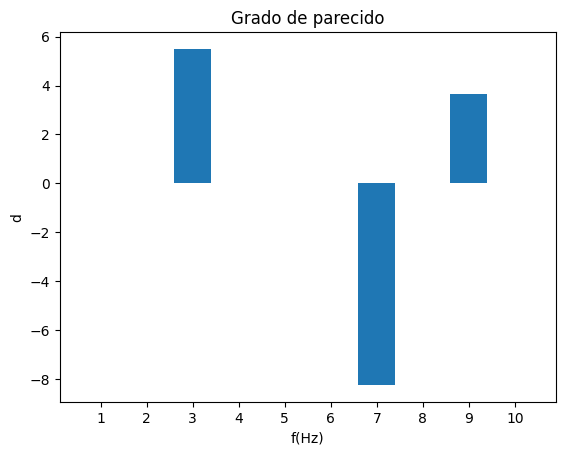

In [12]:
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
plt.title("Grado de parecido")
plt.ylabel("d")
plt.xlabel("f(Hz)")
plt.bar(frecuencias, d)

In [13]:
print(d)

[-6.03683770e-16 -2.13717932e-15  5.50000000e+00 -6.09234885e-15
  4.71844785e-16  6.75848266e-15 -8.25000000e+00 -7.39686090e-15
  3.66666667e+00  1.73472348e-15]


# Con senoidal que sale de lo esperado

In [14]:
A = 8
x = A*np.sin(2*np.pi*5.1*t)
d = np.zeros(len(frecuencias))
for i, sen in zip(range(len(d)), senoidales):
  d[i] = x @ sen

<BarContainer object of 10 artists>

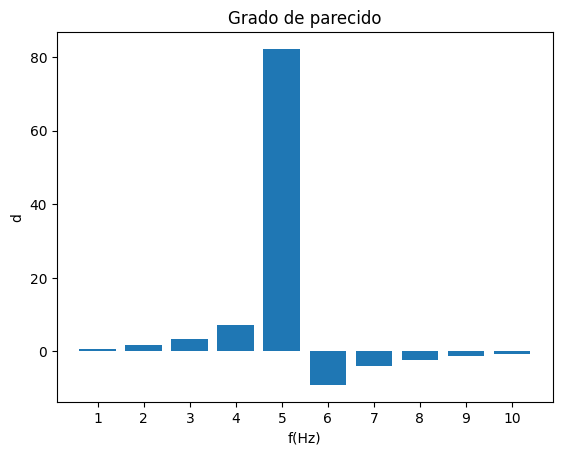

In [15]:
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
plt.title("Grado de parecido")
plt.ylabel("d")
plt.xlabel("f(Hz)")
plt.bar(frecuencias, d)

# Con señal cuadrada

In [16]:
x = signal.square(t)
d = np.zeros(len(frecuencias))
for i, sen in zip(range(len(d)), senoidales):
  d[i] = x @ sen

<BarContainer object of 10 artists>

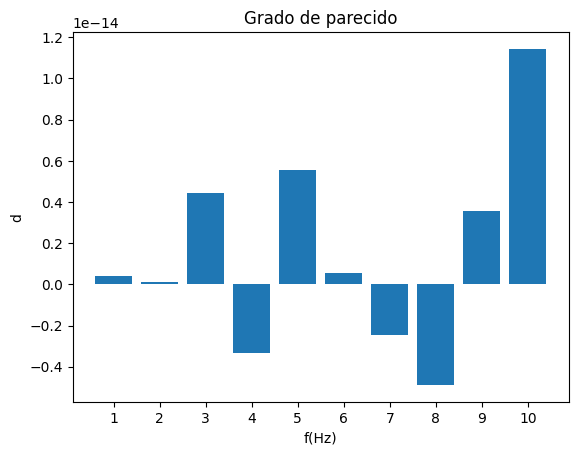

In [17]:
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
plt.title("Grado de parecido")
plt.ylabel("d")
plt.xlabel("f(Hz)")
plt.bar(frecuencias, d)

Son todas muy bajas porque $\frac{1}{2\pi}$ no está en el conjunto de frecuencias.

In [18]:
x = signal.square(2*np.pi*5*t)
d = np.zeros(len(frecuencias))
for i, sen in zip(range(len(d)), senoidales):
  d[i] = x @ sen

<BarContainer object of 10 artists>

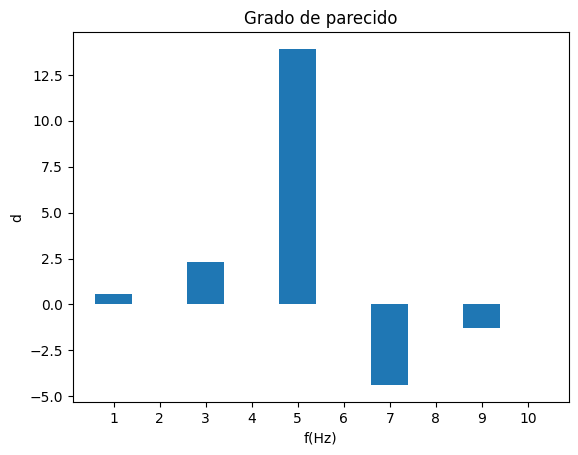

In [19]:
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
plt.title("Grado de parecido")
plt.ylabel("d")
plt.xlabel("f(Hz)")
plt.bar(frecuencias, d)

# Maginitud: $abs()$

In [20]:
x = signal.square(2*np.pi*5*t)
d = np.zeros(len(frecuencias))
for i, sen in zip(range(len(d)), senoidales):
  d[i] = abs(x @ sen)

<BarContainer object of 10 artists>

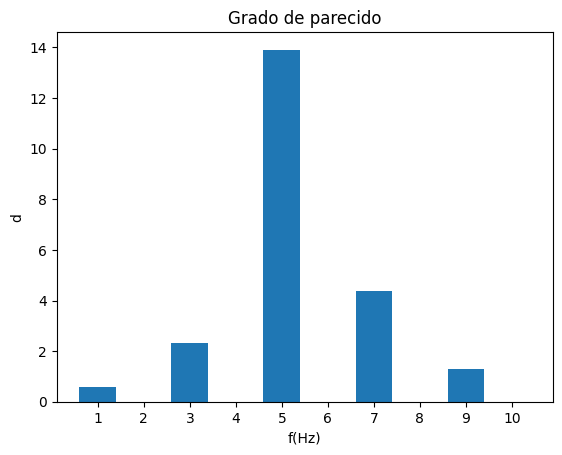

In [21]:
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
plt.title("Grado de parecido")
plt.ylabel("d")
plt.xlabel("f(Hz)")
plt.bar(frecuencias, d)

Con fourier voy a tener que tener tantas dimensiones como muestras tenga.

El elemento sobre el cuál proyecto es una exponencial compleja.

Vamos a hacer lo mismo pero cambiando el conjunto de senoidales que tenemos por exponenciales complejas.

<ipython-input-22-b226fbedc232>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a[n] = np.vdot(x, ec[n]) # <---- producto interno para complejos


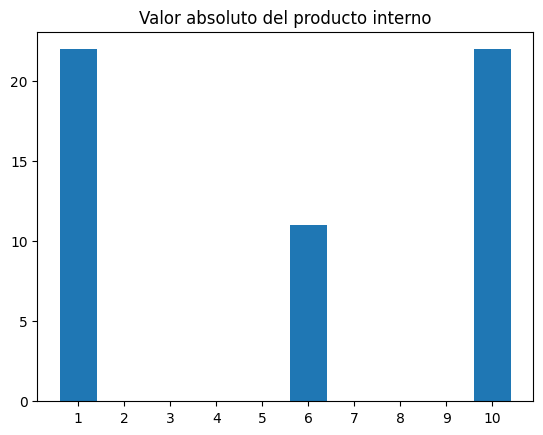

In [22]:
# Conjunto de exponenciales complejas
ec = np.empty(shape=(len(frecuencias), len(t)), dtype = "complex")

for n in range(len(frecuencias)):
  ec[n] = np.exp(1j*2*np.pi*frecuencias[n]*t)

# Señal de prueba
x = ec[0] - 1/2*ec[5] + 1*ec[9] # <---- combinacion lineal de exponenciales complejas de la base

a = np.zeros(len(frecuencias))
for n in range(len(frecuencias)):
  a[n] = np.vdot(x, ec[n]) # <---- producto interno para complejos

# Grafico
fig, ax = plt.subplots()
ax.set_xticks(frecuencias)
ax.set_xticklabels(frecuencias)
ax.bar(frecuencias, abs(a))
plt.title("Valor absoluto del producto interno")
plt.show()


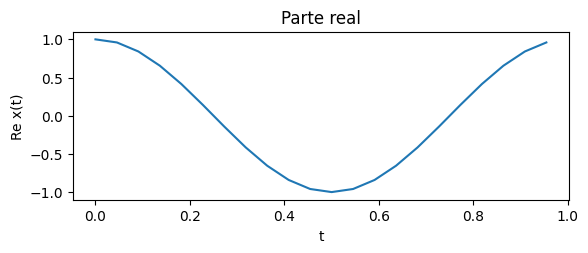

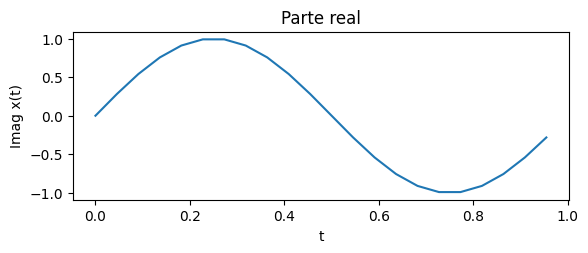

In [23]:
# Visualización de señal compleja de 1 Hz

plt.subplot(2,1,1)
plt.plot(t, ec[0].real)
#plt.plot(ec[0])
plt.xlabel('t')
plt.ylabel("Re x(t)")
plt.title(r"Parte real")
plt.show()


plt.subplot(211)
plt.plot(t, ec[0].imag)
#plt.plot(ec[0])
plt.xlabel('t')
plt.ylabel("Imag x(t)")
plt.title(r"Parte real")
plt.show()

# Transformada rápida de Fourier

In [24]:
from scipy.fft import fft, ifft

<ipython-input-25-9d4b480b848b>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

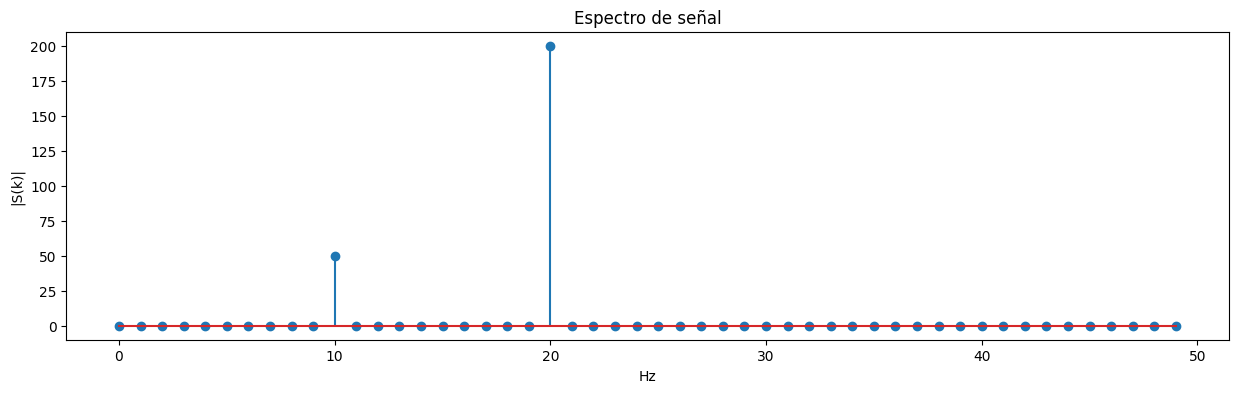

In [25]:
f1 = 10
f2 = 20
Tm = 0.01
fm = 1/Tm
t = np.arange(0, 1 ,1/fm)
N = len(t)
s = np.sin(2*np.pi*f1*t) + 4 * np.sin(2* np.pi * f2 * t)

S = fft(s) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

## Realizar cambios y analizar
- $f_2 = 11Hz$
- $f_1=f_2=10.5Hz$
- $z = sen(f1)+4sen(f2)+4$
- $f_1 = 10 ; f_2 = 20 ; 0 < t < 0.72s$

<ipython-input-26-d1d8a195d02a>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

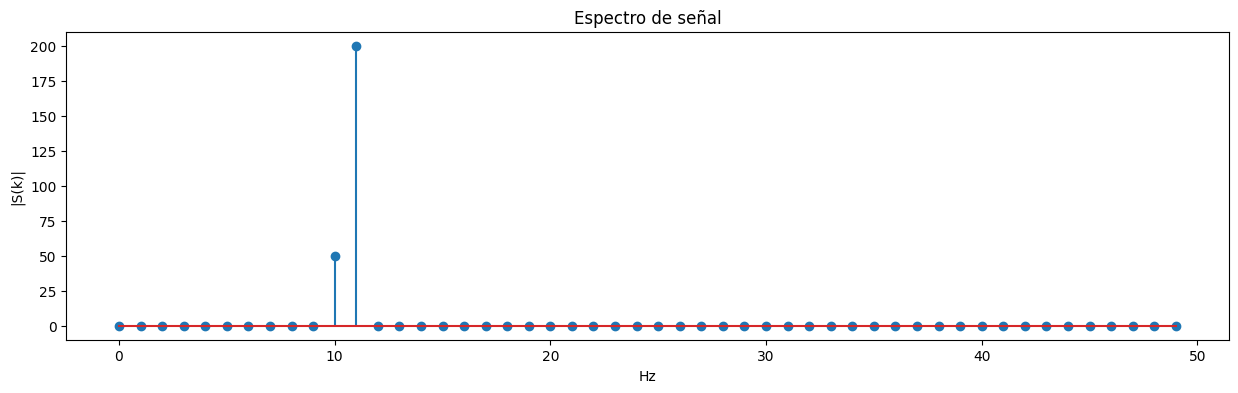

In [26]:
f1 = 10
f2 = 11
Tm = 0.01
fm = 1/Tm
t = np.arange(0, 1 ,1/fm)
N = len(t)
s = np.sin(2*np.pi*f1*t) + 4 * np.sin(2* np.pi * f2 * t)

S = fft(s) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

In [27]:
print("Energia Temp = ", s @ s)
print("Energía Frec = ", (Sabs @ Sabs)/N)

Energia Temp =  849.9999999999998
Energía Frec =  849.9999999999997


<ipython-input-28-0116616e9e57>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

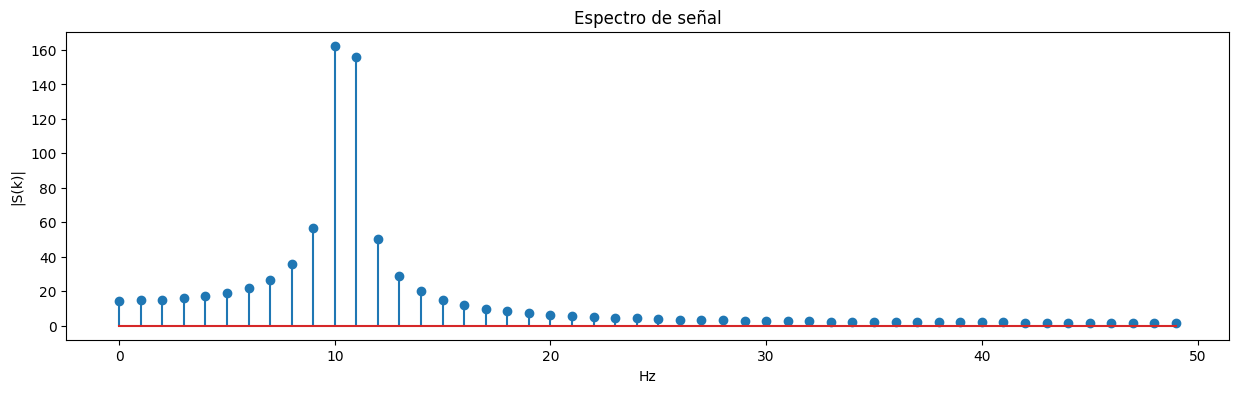

In [28]:
f1 = f2 = 10.5
Tm = 0.01
fm = 1/Tm
t = np.arange(0, 1 ,1/fm)
N = len(t)
s = np.sin(2*np.pi*f1*t) + 4 * np.sin(2* np.pi * f2 * t)

S = fft(s) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

In [29]:
print("Energia Temp = ", s @ s)
print("Energía Frec = ", (Sabs @ Sabs)/N)

Energia Temp =  1249.9999999999998
Energía Frec =  1249.9999999999998


Como es menor que la resolucion frecuencial arrancan a aparecer otras componentes frecuenciales.

La energía no desaparece, sino que se reparte en las otras componentes.

<ipython-input-30-ed11503457b7>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

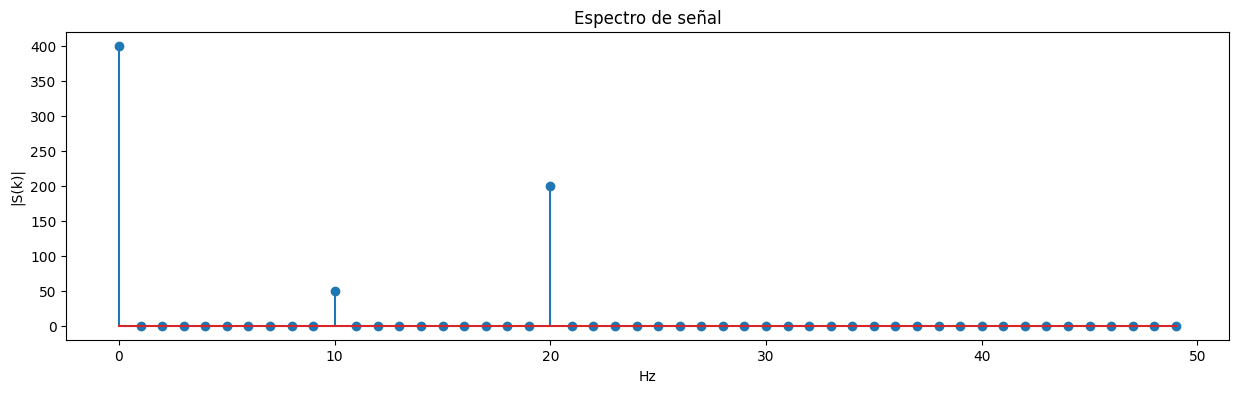

In [30]:
f1 = 10
f2 = 20
Tm = 0.01
fm = 1/Tm
t = np.arange(0, 1 ,1/fm)
N = len(t)
s = np.sin(2*np.pi*f1*t) + 4 * np.sin(2* np.pi * f2 * t) + 4

S = fft(s) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

El pico en 0 es porque la estoy desplazando. Aparte aparece mucho más grande porque el 0 tengo un solo lado. El 20 aparece de un solo lado pero tmb esta en -20

In [31]:
print("Energia Temp = ", s @ s)
print("Energía Frec = ", (Sabs @ Sabs)/N)

Energia Temp =  2449.9999999999995
Energía Frec =  2450.0


<ipython-input-32-96b4a13e6e53>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

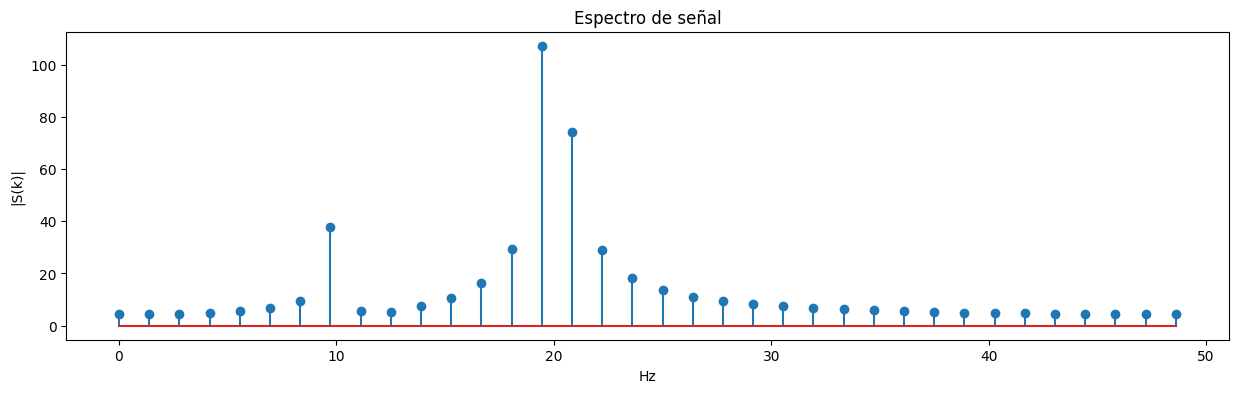

In [32]:
f1 = 10
f2 = 20
Tm = 0.01
fm = 1/Tm
t = np.arange(0, 0.72 ,1/fm)
N = len(t)
s = np.sin(2*np.pi*f1*t) + 4 * np.sin(2* np.pi * f2 * t)

S = fft(s) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

In [33]:
print("Energia Temp = ", s @ s)
print("Energía Frec = ", (Sabs @ Sabs)/N)

Energia Temp =  614.2897634128117
Energía Frec =  614.2897634128115


In [34]:
print("N:", len(t))
print("Resolucion frecuencial = ", fm/len(t))

N: 72
Resolucion frecuencial =  1.3888888888888888


Parseval:
$x @ x$ vs.$\frac{Sabs@Sabs}{N}$